# Exercice DataFrame avec le dataset Titanic

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exercice 11.1

 * Ouvrir le dataset Titanic avec le format excel.
 * Sauver le fichier dans un *'store'* HDF5
 * explorer le dataset.
 
 

Sur kaegle voici les infos
https://www.kaggle.com/c/titanic/data

VARIABLE DESCRIPTIONS:
 * survival        Survival
                (0 = No; 1 = Yes)
 * pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
 * name            Name
 * sex             Sex
 * age             Age
 * sibsp           Number of Siblings/Spouses Aboard
 * parch           Number of Parents/Children Aboard
 * ticket          Ticket Number
 * fare            Passenger Fare
 * cabin           Cabin
 * embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
 





# Solution 11.1

In [4]:
passenger = pd.read_excel('dataset titanic.xlsx')
passenger
store = pd.HDFStore('dataset titanic.h5')
store['passenger'] = passenger
store.flush()




/home/sgarcia/.virtualenvs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3066: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
passenger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [7]:
passenger.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [8]:
passenger.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exercice 11.2

 * Faire un fichier excel avec un onglet pour chaque classe.
 * Faire un autre fichier excel avec un onglet pour chaque port d'embarcation
 * Faire un fichier excel avec les passager classé par age.



In [14]:
writer = pd.ExcelWriter('passenger_by_pclass.xlsx')
#data = passenger[passenger.Pclass == 1]
#data.to_excel(sheet_name='class 1')
passenger[passenger.Pclass == 1].to_excel(writer, sheet_name='class 1')
passenger[passenger.Pclass == 2].to_excel(writer, sheet_name='class 2')
passenger[passenger.Pclass == 3].to_excel(writer, sheet_name='class 3')
writer.save()

# Solution 11.2

In [15]:
allpclass = [1, 2, 3]
writer = pd.ExcelWriter('passenger_by_pclass.xlsx')
for pclass in allpclass:
    data = passenger[passenger['Pclass']==pclass]
    data.to_excel(writer, sheet_name='class {}'.format(pclass))
writer.save()

In [18]:
allembarked = passenger['Embarked'].unique()
print(allembarked)
writer = pd.ExcelWriter('passenger_by_embarked.xlsx')
for embarked in allembarked:
    if type(embarked) == str:
        data = passenger[passenger.Embarked==embarked]
    else:
        data = passenger[passenger.Embarked.isnull()]        
    data.to_excel(writer, sheet_name='embarked {}'.format(embarked))
writer.save()

['S' 'C' 'Q' nan]


In [19]:
ordered = passenger.sort_values(by='Age')
ordered.to_excel('passenger ordered.xlsx')
ordered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


# Exercice 11.3

 * Selectioner les passager embarqué à **S** de la pclass **3**
 * combien sont ils ?
 * Faire la moyenne de leur age/STD/median age
 * Répartition H/F
 * Taux de survie.

# Solution 11.3

In [23]:
d = passenger[(passenger.Embarked=='S') & (passenger.Pclass==3)]
d = passenger.loc[(passenger.Embarked=='S') & (passenger.Pclass==3), :]
d.describe()
print(d.shape)
print('count ', d['PassengerId'].count())
print('mean age ', d['Age'].mean())
print('std age ', d['Age'].std())
print('median age', d['Age'].median())
sex = d['Sex']
print('no value', sex[sex.isnull()].count())
for s in ['male', 'female']:
    print(s, ':', sex[sex==s].count())
print('Survived rate', d['Survived'].mean())

(353, 12)
count  353
mean age  25.6965517241
std age  12.110905685
median age 25.0
no value 0
male : 265
female : 88
Survived rate 0.189801699717


In [26]:
d = passenger[(passenger.Embarked=='S') & (passenger.Pclass==3)]
d = passenger.loc[(passenger.Embarked=='S') & (passenger.Pclass==3), :]
d.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,353.000000,353.000000,353,290.000000,353.000000,353.000000,353.000000
mean,440.685552,0.189802,3,25.696552,0.705382,0.439093,14.644083
std,263.352933,0.392701,0,12.110906,1.529408,0.954863,13.276609
min,1.000000,0.000000,3,1.000000,0.000000,0.000000,0.000000
25%,201.000000,0.000000,3,19.000000,0.000000,0.000000,7.854200
50%,432.000000,0.000000,3,25.000000,0.000000,0.000000,8.050000
75%,668.000000,0.000000,3,32.000000,1.000000,0.000000,16.100000
max,889.000000,1.000000,3,74.000000,8.000000,6.000000,69.550000


# Exercice 11.4

 * Moyenne des survis par classe
 * Faite une dissertion de gauche sur le taux de suivie en fonction de la classe.
 * Moyenne des survis par port d'embarcation
 * Moyenne des survis par (port d'embarcation X classe)
 * Sauvegarder tout ça sous excel
 


# Solution 11.4

In [28]:
by_pclass = passenger.groupby('Pclass')['Survived'].mean()
by_embarked = passenger.groupby('Embarked')['Survived'].mean()
by_pclass_embarked = passenger.groupby(['Pclass', 'Embarked' ])['Survived'].mean()
print(by_pclass)
print(by_embarked)
print(by_pclass_embarked)


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
Pclass  Embarked
1       C           0.694118
        Q           0.500000
        S           0.582677
2       C           0.529412
        Q           0.666667
        S           0.463415
3       C           0.378788
        Q           0.375000
        S           0.189802
Name: Survived, dtype: float64


In [35]:
#creer un colonne vide
passenger['decade'] = pd.Series()
passenger

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,decade
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,NaN


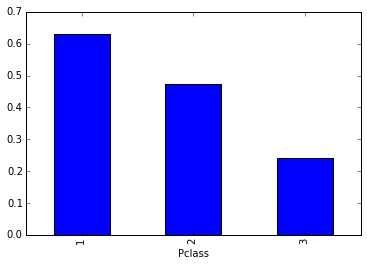

In [31]:
by_pclass.plot(kind='bar')
#by_pclass_embarked.plot(kind='bar')

# Exercice 11.5

 * Créer une colone *'decade'* pour les tranches d'age
 * compter le nombre de passage par tranche d'age
 * taux de survie par tranche d'age
 

# solution 11.5

In [37]:
passenger['age_decade'] = passenger['Age']//10
passenger.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,decade,age_decade
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,NaN,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,NaN,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,NaN,3


In [40]:
passenger.groupby('age_decade')['Name'].count()

age_decade
0     62
1    102
2    220
3    167
4     89
5     48
6     19
7      6
8      1
Name: Name, dtype: int64

In [41]:
passenger.groupby('age_decade')['Survived'].mean()

age_decade
0    0.612903
1    0.401961
2    0.350000
3    0.437126
4    0.382022
5    0.416667
6    0.315789
7    0.000000
8    1.000000
Name: Survived, dtype: float64

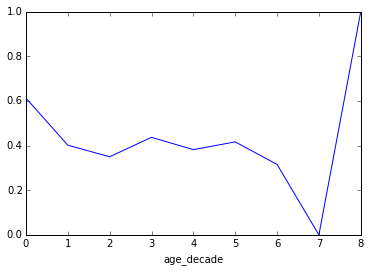

In [42]:
passenger.groupby('age_decade')['Survived'].mean().plot()

# Exercice 11.6

 * prix du ticket pour les survivants/non survivants

# Solution 11.6


In [16]:
passenger.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

# Exercice 11.7

 * demandez vous si la règle "les femmes et les enfants d'abord" a été respectée.

# Solution 11.7

In [17]:
passenger.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [18]:
print(passenger[passenger.Age>=16]['Survived'].mean())
print(passenger[passenger.Age<16]['Survived'].mean())

0.38193343898573695
0.5903614457831325


In [43]:
passenger['child'] = passenger.Age<16
passenger.groupby(['Sex', 'child'])['Survived'].mean()

Sex     child
female  False    0.756458
        True     0.651163
male    False    0.163873
        True     0.525000
Name: Survived, dtype: float64